In [1]:
import phys.light
import numpy as np
import matplotlib.pyplot as plt

T = 2000
Eg = np.linspace(phys.light.E_from_wavelength(500000e-9), phys.light.E_from_wavelength(500e-9), 10000)
gamma = phys.light.planck_distribution(Eg, T)

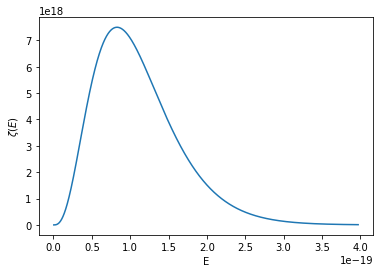

In [2]:
plt.plot(Eg, gamma)
plt.xlabel("E")
plt.ylabel("$\zeta(E)$")
plt.show()

In [1]:
E = [phys.light.planck_phot_distribution(phys.light.E_from_wavelength(500000e-9), phys.light.E_from_wavelength(100e-9), T, bins=50000) for x in range(10000)]
phot = phys.light.generate_photons_from_E(E)

NameError: name 'phys' is not defined

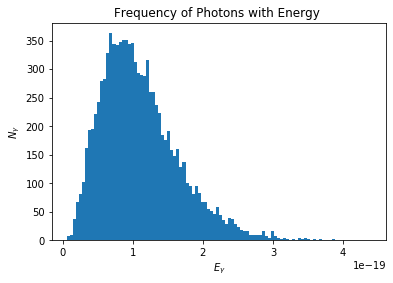

In [4]:
plt.hist(E, 100)
plt.xlabel("$E_\gamma$")
plt.ylabel("$N_\gamma$")
plt.title("Frequency of Photons with Energy ")
plt.show()

In [5]:
import phys
import phys.newton
sim = phys.Simulation({"cl_on": True, "exit": lambda cond: cond.t >= 0.200})
sim.add_objs(phot)
sim.add_step(0, phys.UpdateTimeStep(lambda x: 0.0005))
sim.add_step(1, phys.newton.NewtonianKinematicsStep())
sim.add_step(2, phys.light.ScatterSphericalStep(0.00000000000001, 0.000000000000005, wavelength_dep_scattering=True))
sim.add_step(3, phys.light.TracePathMeasureStep(None, id_info_fn = lambda x: str(x.E), trace_dv = True))
sim.add_step(4, phys.light.ScatterMeasureStep(None, measure_n = True, measure_locs = [[x * (phys.light.c) * 0.0005 * 50, 0, 0] for x in range(1, 5)], measure_E = True))

In [6]:
import time
sim.start()

while sim.running:
    time.sleep(5)
    print(sim.get_state())

{'objects': 10000, 't': 0.007500000000000003, 'dt': 0.0005, 'run_time': 5.007988929748535}
{'objects': 10000, 't': 0.01450000000000001, 'dt': 0.0005, 'run_time': 10.013158321380615}
{'objects': 10000, 't': 0.021500000000000016, 'dt': 0.0005, 'run_time': 15.085787057876587}
{'objects': 10000, 't': 0.029000000000000022, 'dt': 0.0005, 'run_time': 20.104201078414917}
{'objects': 10000, 't': 0.036000000000000025, 'dt': 0.0005, 'run_time': 25.229357957839966}
{'objects': 10000, 't': 0.04300000000000003, 'dt': 0.0005, 'run_time': 30.262603998184204}
{'objects': 10000, 't': 0.05000000000000004, 'dt': 0.0005, 'run_time': 35.278918981552124}
{'objects': 10000, 't': 0.057000000000000044, 'dt': 0.0005, 'run_time': 40.360005617141724}
{'objects': 10000, 't': 0.06400000000000004, 'dt': 0.0005, 'run_time': 45.36193132400513}
{'objects': 10000, 't': 0.07050000000000005, 'dt': 0.0005, 'run_time': 50.36978507041931}
{'objects': 10000, 't': 0.07750000000000005, 'dt': 0.0005, 'run_time': 55.38253593444824

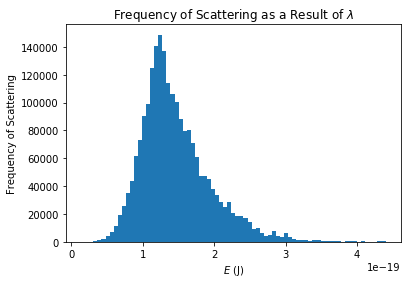

In [7]:
xy = []
for z in sim.steps[3].data[1:]:
    r = [np.double(z[0])] * z[1]
    xy.extend(r)
x = [np.double(z[0]) for z in sim.steps[3].data[1:]]
y = [np.double(z[1]) for z in sim.steps[3].data[1:]]
plt.hist(xy, 75)
plt.xlabel("$E$ (J)")
plt.ylabel("Frequency of Scattering")
plt.title("Frequency of Scattering as a Result of $\lambda$")
plt.show()

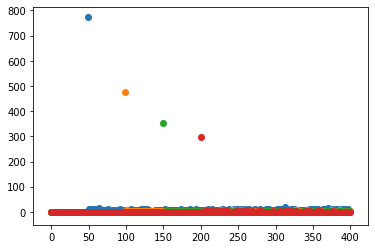

In [8]:
for y in range(0, 4): 
    plt.scatter(range(0, len(sim.steps[4].data)), [len(sim.steps[4].data[x][3 + y * 2]) for x in range(0, len(sim.steps[4].data))])

plt.show()

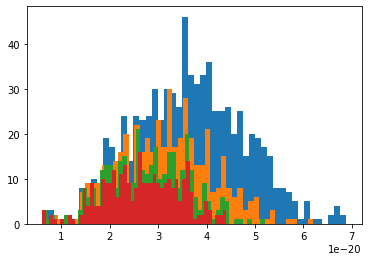

In [9]:
plt.hist(sim.steps[4].data[49][3], 50)
plt.hist(sim.steps[4].data[99][5], 50)
plt.hist(sim.steps[4].data[150][7], 50)
plt.hist(sim.steps[4].data[200][9], 50)
plt.show()

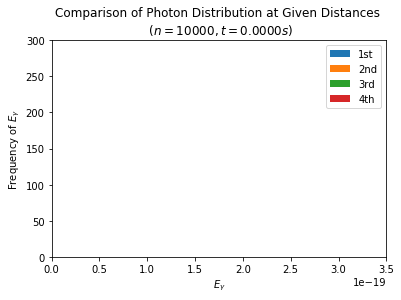

In [10]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation

fig = plt.figure()
hist = plt.hist([], 100)

def update(frame):
    plt.cla()
    plt.hist(sim.steps[4].data[frame][3], 50, label="1st")
    plt.hist(sim.steps[4].data[frame][5], 50, label="2nd")
    plt.hist(sim.steps[4].data[frame][7], 50, label="3rd")
    plt.hist(sim.steps[4].data[frame][9], 50, label="4th")
    plt.xlim(0, 3.5e-19)
    plt.ylim(0, 300)
    plt.legend()
    plt.ylabel("Frequency of $E_\gamma$")
    plt.xlabel("$E_\gamma$")
    plt.title("Comparison of Photon Distribution at Given Distances \n ($n = " + str(len(E)) + ", t = " + "{:.4f}".format(0.0005 * frame) + " s$)")

ani = FuncAnimation(fig, update, len(sim.steps[4].data))
ani.save("out.mp4", "ffmpeg", fps=20, dpi=144)

plt.show()